16-2 번역의 흐름 <br>
16-3 지적 생성을 위한 넓고 얕은 탐색 (1) Greedy Decoding <br>
16-4 지적 생성을 위한 넓고 얕은 탐색 (2) Beam Search <br>
16-5 지적 생성을 위한 넓고 얕은 탐색 (3) Sampling <br>
16-6 방과 후 번역 수업 (1) Data Augmentation <br>
16-7 방과 후 번역 수업 (2) Lexical Substitution <br>
16-8 방과 후 번역 수업 (3) Back Translation <br>
16-9 방과 후 번역 수업 (4) Random Noise Translation <br>
16-10 채점은 어떻게? <br>
16-11 실례지만, 어디 챗씨입니까? (1) 챗봇과 번역기 <br>
16-12 실례지만, 어디 챗씨입니까? (2) 좋은 챗봇이 되려면 <br>
16-13 실례지만, 어디 챗씨입니가? (3) 대표적인 챗봇 <br>
16-14 마무리


### 16-2 번역의 흐름
#### 규칙 기반 기계 번역
조지타운-IBM의 한계는 명확하다. <br>

#### 통계적 기계 번역
통계적 기계 번역(SMT, Statistical Machine Translation)


"문장이 존재할 확률을 측정한다." 통계적 언어 모델을 활용한 <b>SMT</b>는 과연 어떻게 동작하는 걸까? 번역은 자연스러운 문장을 생성하는 것뿐만 아니라 번역문의 문법 구조도 고려해야 하기 때문에 단순히 P(Target | Source) 만을 고려해서는 안 된다. 원문과 번역문, 각 단어 간의 매핑 관계를 추가로 고려해야 하는데, 그 관계를 <b>정렬(Alignment)</b> 이라고 부른다. <br>

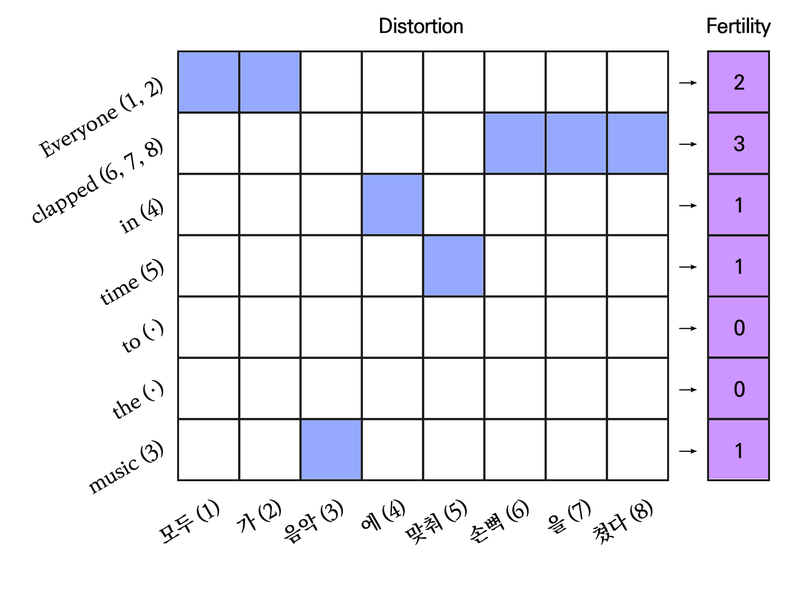 <br>
정렬에는 <b>퍼틸리티(Fertility)</b>와 <b>왜곡(Distortion)</b>, 두 가지 요소가 포함된다. <br>

<b>퍼틸리티</b>는 직역하면 '출생률' 정도 되는 뜬금없는 의미를 갖고 있는데요, <b>원문의 각 단어가 번역 후에 몇 개의 단어로 나타나는지를 의미하는 값</b>이다. 위 예를 따르면 Everyone의 퍼틸리티는 2이고, Clapped 의 퍼틸리티는 3이다. 그리고 to, the 의 퍼틸리티는 0이다! 번역에 직접적으로 등장하지 않는다는 의미이다. 퍼틸리티에 대한 확률은 p(n|w) 로 정의되며 n은 퍼틸리티 값, w는 원문의 단어이다. music 은 높은 확률로 음악 으로만 번역될 테니 p(1|music) = 0.9 정도로 표현할 수 있다. <br>

왜곡은 원문의 단어가 번역문에서 존재하는 위치를 나타낸다. 위의 예에서 Clapped는 손뼉(6) 을(7) 쳤다(8) 로 번역되므로 Clapped의 왜곡은 (6, 7, 8)로 나타낸다. 왜곡에 대한 확률은 p(t|s, l) 로 정의되며 t은 번역문에서 각 단어의 위치, s는 원문에서 각 단어의 위치, 그리고 l은 번역문의 길이이다. Everyone(1) 으로 시작하는 문장은 모두(1) / 가(2) 라고 번역될 확률이 높으니 p(1|1, 8) x p(2|1, 8) 역시 제법 높을 것을 추측할 수 있다. <br>

통계적 언어 모델에서 파생된 확률에 위 모든 확률을 곱하여 학습하는 것이 바로 통계적 기계 번역이다. <br>

'in time to'를 묶어서 한번에 '~에 맞춰'로 번역을 하는 <b>구문 기반 번역(PBMT, Phrase Based Machine Translation)</b> 이 등장하여 꽤나 최근인 2006년까지도 사용되었다. 또 규칙기반 번역과 결합하여 하이브리드로 사용된 사례도 있다. 하지만 모든 기업을 하나로 수렴하게 만드는 끝판왕이 등장하게 된다. <br><br>

#### 신경망 기계 번역
그게 바로 <b>신경망 기계 번역(Neural Machine Translation)</b>이다. seq2seq나 transformer는 신경망 기계 번역에 활용되는 대표적인 모델들이다. <br><br>


### 16-3 지적 생성을 위한 넓고 얕은 탐색 (1) Greedy Decoding
<b>가장 높은 확률을 갖는 단어가 다음 단어로 결정되는 순간이다!</b> 아주 직관적인 개념이기에 별다른 언급이 없이 "음~ 그렇구나~" 하고 넘어갔지만, 이는 엄연히 <b>탐욕 알고리즘(Greedy Algorithm)</b>이 사용된 것이다. 탐욕적인 방법으로 문장을 Decoding 하니 기계 번역에서는 이를 <b>Greedy Decoding</b>이라고 칭한다. 탐욕적인 방법은 효율적이지만 최적의 해를 구해준다는 보장이 없다. 즉 우리는 지금 <b>최고의 번역을 생성하고 있는 것이 아닌 것이다.</b>

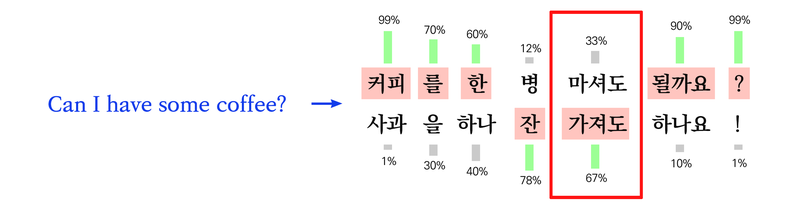 <br>
훈련 데이터가 실제 세계의 모든 데이터를 포함할 수는 없기 때문에, have 가 마시다 로 사용되는 경우가 훈련 데이터에 적거나 없었다면 탐욕적인 방법은 have 를 가장 높은 확률을 갖는 가지다 로 번역할 수밖에 없었을 것이다. 실제 세계에서는 높은 확률로 존재하는 문장이지만 훈련 데이터 세계에서는 커피를 가지는 게 더 타당하다는 거다! <br>

이를 어떻게 해결할 수 있을까? 단어 사전으로 만들 수 있는 모든 문장을 만든 후, 실제 세계에 존재하는 우리가 직접 고르는 방법은 어떤가? 확실히 가장 멋진 문장을 골라낼 수는 있을 것 같다. 1,000개의 단어를 갖는 사전으로 3개 단어 문장 하나를 만드는 데에 1,000,000,000개 문장이 서비스로 온다는 것은 조금 문제일 수도 있다! <br><br>


### 16-4 지적 생성을 위한 넓고 얕은 탐색 (2) Beam Search
모든 문장을 다 만들어보는 것은 $ O(V^L) $의 보갖ㅂ도를 갖는다는 것을 제외하곤 좋은 방법이긴 하다. 확실히 원하는 문장이 만들어질 거라는 보장이 있으니깐! 효율성 측면에서 문제가 있으니, 그 부분을 개선하면 되지 않을까? <br>

<b> Beam Search </b>는 그런 아이디어에서 출발한 알고리즘이다. 단어 사전으로 만들 수 있는 모든 문장을 만드는 대신, <b> 지금 상황에서 가장 높은 확률을 갖는 Top-K 문장만 </b>남기는 것이다. <br>

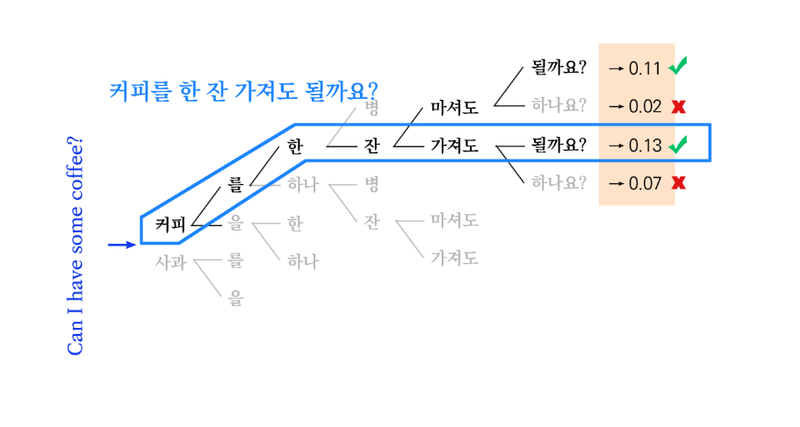 <br>

상위 몇 개의 문장을 기억할지는 <b>Beam Size(혹은 Beam Width라고 함)</b>로 정의해 줄 수 있다. 위 예시는 Beam Size를 2로 하는 Beam Search를 표현한 것이죠. Beam Size는 연산량과 성능 간의 Trade-off 관계를 가지고 있다. 다시 말해, 자원이 무한하다면 <b>Beam Size를 키우면 키울수록 성능이 좋아진다</b>는 것이다. 직접 실험을 통해 찾아보는 것이 좋으나 대체로 5 나 10 을 적합한 값으로 택하곤 한다.

In [ ]:
import math
import numpy as np

def beam_search_decoder(prob, beam_size):
    sequences = [[[], 1.0]]  # 생성된 문장과 점수를 저장

    for tok in prob:
        all_candidates = []

        for seq, score in sequences:
            for idx, p in enumerate(tok): # 각 단어의 확률을 총점에 누적 곱
                candidate = [seq + [idx], score * -math.log(-(p-1))]
                all_candidates.append(candidate)

        ordered = sorted(all_candidates,
                         key=lambda tup:tup[1],
                         reverse=True) # 총점 순 정렬
        sequences = ordered[:beam_size] # Beam Size에 해당하는 문장만 저장 

    return sequences

In [ ]:
vocab = {
    0: "<pad>",
    1: "까요?",
    2: "커피",
    3: "마셔",
    4: "가져",
    5: "될",
    6: "를",
    7: "한",
    8: "잔",
    9: "도",
}

# prob_seq은 문장의 각 위치에서 어떤 단어가 생성될지의 확률을 한 번에 정의해둔 것입니다.
# 실제로는 각 단어에 대한 확률이 prob_seq처럼 한번에 정의되지 않기 때문에 실제 문장 생성과정과는 거리가 멉니다.
# 하지만 Beam Search의 동작과정 이해를 돕기위해 이와 같은 예시를 보여드립니다.
# prob_seq의 각 열은 위 vocab의 각 숫자(key)에 대응됩니다.
prob_seq = [[0.01, 0.01, 0.60, 0.32, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], # 커피 : 0.60
            [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.75, 0.01, 0.01, 0.17], # 를 : 0.75
            [0.01, 0.01, 0.01, 0.35, 0.48, 0.10, 0.01, 0.01, 0.01, 0.01], # 가져 : 0.48
            [0.24, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.68], # 도 : 0.68
            [0.01, 0.01, 0.12, 0.01, 0.01, 0.80, 0.01, 0.01, 0.01, 0.01], # 될 : 0.80
            [0.01, 0.81, 0.01, 0.01, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01], # 까요? : 0.81
            [0.70, 0.22, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], # <pad> : 0.91
            [0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], # <pad> : 0.91
            [0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], # <pad> : 0.91
            [0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]] # <pad> : 0.91

prob_seq = np.array(prob_seq)
beam_size = 3

result = beam_search_decoder(prob_seq, beam_size)

for seq, score in result:
    sentence = ""

    for word in seq:
        sentence += vocab[word] + " "

    print(sentence, "// Score: %.4f" % score)

굳이 고정된 개수의 문장을 얻지 않아도 된다면 <b>적당한 Beam Size를 설정해 준 후 Score를 기준으로 필터링</b>하는 방법도 좋겠다.

In [ ]:
# Q. beam_size 인자 값을 바꿔보세요.
beam_size = 5

result = beam_search_decoder(prob_seq, beam_size)

for seq, score in result:
    sentence = ""

    for word in seq:
        sentence += vocab[word] + " "

    print(sentence, "// Score: %.4f" % score)

### 16-5 지적 생성을 위한 넓고 얕은 탐색 (3) Sampling

<b>Sampling</b>은 자주 사용되는 방법은 아니지만 굉장히 흥미롭다. 앞서 살펴본 방법들은 <b>다음의 단어로 나올 확률이 높은 단어를 선택</b>하는 방식이었다. 작문이라는 것은 더 복잡하다. 어떻게 하면 매번 새로우면서도 의미가 유지되는 문장을 만들 수 있을까? 지금까지 확률을 기준으로 단어를 선택해왔으니, <b>확률적으로 단어를 뽑는 방법</b>은 어떨까? <br>

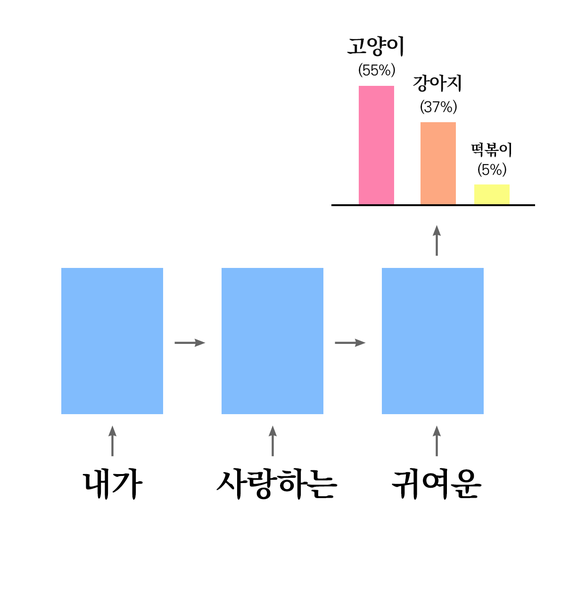 <br><br>


### 16-6 방과 후 번역 수업 (1) Data Augmentation 
Data Augmentation은 '데이터 증가', '데이터 확대' 등으로 직역되며 훈련 데이터를 수십 배까지도 부풀리는 기술을 의미한다! 주로 이미지 처리 영역에서 많이 사용되는데, 그 방법을 이해하고 나면 '그럴 수밖에 없겠구나...' 할 것이다. <br>

이미지 데이터는 어떤 변화를 시켜도 <b>왜곡이 크지 않고 심지어 일괄적으로 처리할 수 있다</b>는 장점, 하지만 문장 데이터는? <br><br>


### 16-7 방과 후 번역 수업 (2) Lexical Substitution
<b>Lexical Substitution</b>은 <b>'어휘 대체'</b>로 직역된다. <br>

#### 동의어 기반 대체 
시소러스(Thesaurus)란, 어떤 단어의 동의어나 유의어를 집중적으로 구축해놓은 사전을 의미한다. <b>동의어 기반 대체</b>는 이 시소러를 활용한 방법이다. 대표적인 시소러는 <b>워드넷</b>을 잘 다룬 글이 있다. <br> https://kh-kim.gitbook.io/natural-language-processing-with-pytorch/00-cover-4/03-wordnet
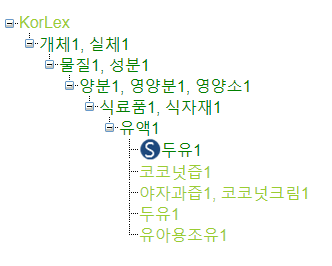 <br><br>

#### Embedding 활용 대체
<b> Pre-training Word Embedding</b>을 활용하는 방법이 바로 그것이다. 우리는 이미 Word2Vec이나 GloVe등의 기법들을 배웠다. 이 기법들을 통해 학습된 Embedding은 유사한 단어들끼리 비슷한 공간에 밀집되던 것을 기억. 사람이 일일이 정의한 데이터베이스 대신 이 <b>Embedding의 유사도를 기반으로 단어를 대체</b>하면 훨씬 편리할듯
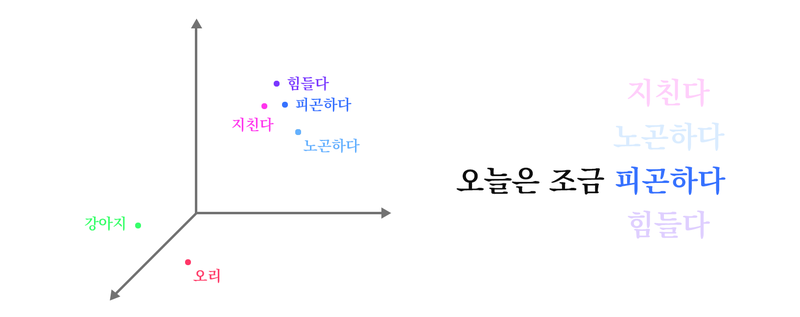 <br><br>

#### TF-IDF 기반 대체
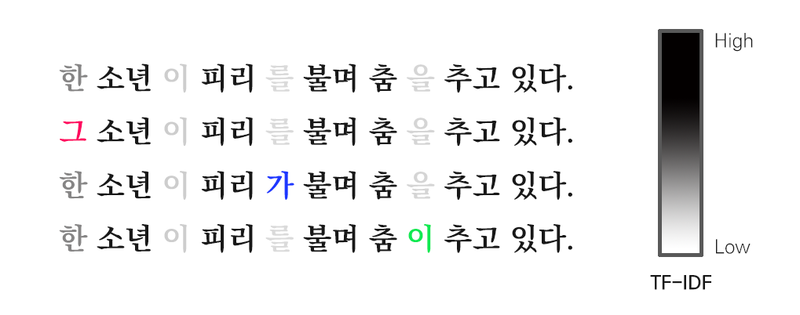 <br>
<b>TF-IDF</b>는 여러 문서를 기반으로 단어마다 중요도를 부여하는 알고리즘이다. 문서의 핵심이 되는 소년, 피리 같은 단어들은 높은 TF-IDF 값을 부여받고, '한', '를'과 같은 단어들은 낮은 TF-IDF 값을 가지게 됩니다. 이때, <b>낮은 TF-IDF 값을 갖는 단어</b>들은 핵심 단어가 아니기 때문에 <b>다른 단어로 대체해도 문맥이 크게 변하지 않는다</b>는 것에 주목한 아이디어입니다. <br><br>


### 16-8 방과 후 번역 수업 (3) Back Translation
<b>Back Translation</b>은 단일 언어 데이터는 구하기 쉽고 많지만 병렬 쌍을 이룬 언어 데이터를 찾기는 어렵다는 문제를 해결하고자 등장했다. <b>번역 모델에 단일 언어 데이터를 학습시키는 방법</b>이다! <br> https://dev-sngwn.github.io/2020-01-07-back-translation/
Sequence-to-Sequence의 구조를 되새겨보면, Source문장을 Encoding하는 부분과 Target 문장을 Decoding하는 부분을 분리하여 모듈들이 각 언어를 더 잘 처리할 수 있게 했었다. 그렇다면 <b>Enocder에는 Source 언어로 된 문장</b>을, <b>Decoder에는 Target 언어로 된 문장</b>을 좀 더 훈련시키면 어떨까? <br><br>

### 16-9 방과 후 번역 수업 (4) Random Noise Injection
https://wikidocs.net/166833 참고 <br>
QWERTY 키보드를 이용 <br>
#### 공백 노이즈 추가
_ 토큰을 활용하며 이를 <b>Placeholder Token(이하 공백 토큰)</b>이라고 부른다. 문장의 일부 단어를 공백 토큰으로 치환, <b>학습외 과적합을 방지하는데에 좋은 효과</b>를 볼 수 있다고 한다. <br>
#### 랜덤 유의어 추가
불용어(Stop word)가 아닌 단어를 랜덤하게 뽑은 후, 해당 단어와 유사한 단어를 골라 문장에 아무렇게나 삽입하는 방식이다. <br>
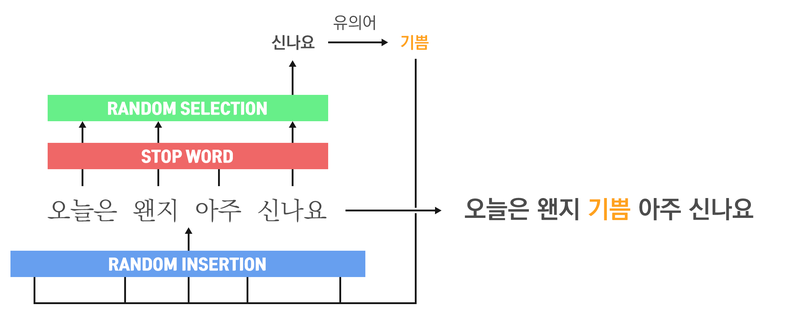 <br>

Lexical Substitution과 비슷한 느낌이지만 <b>원본 단어가 손실되지 않는다</b>. Word2Vec의 아이디어를 생각하면 유사어를 삽입하는 것이 <b>모델의 Embedding 층을 더 견고하게</b> 만들어 줄 것 같다.<br><br>


### 16-10 채점은 어떻게?
<b>BLEU(Bilingual Evaluation Understudy) Score</b>는 '기계가 실제 번역을 얼마나 잘 재현했는가?'를 평가하는 지표이다. https://donghwa-kim.github.io/BLEU.html <b>BLEU Score로 줄세우기가 가능</b>하다는 것을 알았다. <b>GLUE</b> 또한 <b>기계번역 너머의 자연어 이해를 평가하기 위해 고안된 지표</b>이다. <br><br>


### 16-11 실례지만, 어디 챗씨입니까? (1) 챗봇과 번역기
<b>챗봇과 번역기는 같은 집안</b>이라고 한다. https://norux.me/56 <br>
<b>질문만 하는 나라의 언어를 Source언어</b>라고 하고 <b>답변만 하는 나라의 언어를 Target 언어</b>라고 한다면 Source 문장을 Target 문장으로 <b>번역하는 행위</b>가 곧 <b>질문에 답하는 행위</b>가 되는 셈이다. 물론 다양한 일상적인 대화도 이 같은 방법으로 학습이 가능하다. <br>

조금 더 자세하게 설명하자면, Encoder는 Source 문장을 읽고 이해한 내용을 추상적인 고차원 문맥 벡터로 압축합니다. Decoder는 Encoder가 만든 문맥 벡터를 바탕으로 Target 문장을 생성하죠. 이 과정은 <b>Source 언어의 Embedding 공간 속 문장을 Target 언어의 Embedding 공간으로 매핑한다</b>고 할 수 있다. 수많은 데이터로 학습하는 것은 그 과정을 더 잘 해내기 위함이다! <br>

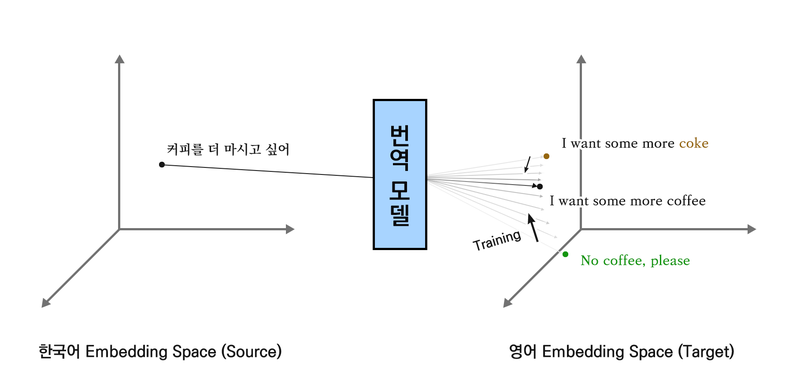 <br>
<b>번역기를 챗봇으로 사용하는 게 가능</b>하다! <br><br>


### 16-12 실례지만, 어디 챗씨입니까? (2) 좋은 챗봇이 되려면
#### 200ms 
대화가 자연스럽게 느껴지는 답변의 <b>공백 마지노선</b>이다. 인간이 챗봇한테 말을 걸었을 때, <b>0.2초 이내에 답변이 나오는 것이 바람직하다</b>

#### 시공간을 담은 질문
<b> 질문이 고유한 답변을 가진다면 </b> 챗봇이 학습하기 좋지만 요일을 묻는 질문은 <b>매일 답변이 변하니</b> 학습을 할 수가 없다. <b>특정 시공간에 의해 결정되는 질문</b>은 단순한 학습으로 답변할 수가 없다. 그래서 보통은 질문의 의도를 파악한 후, 시공간에 대한 질문은 다른 모듈로 연결하여 예외 처리를 하곤 한다. 그래서 보통은 질문의 의도를 파악한 후, 시공간에 대한 질문은 다른 모듈로 연결하여 예외 처리를 한곤 한다. 앞의 인공지능 비서가 왜 10개 이상의 모듈을 갖는지 조금 이해가 간다. <br> 

#### 페르소나
<b>인격의 일관성(Coherent Personality)</b>라는 주제로 다뤄진 것과 유사한 얘기다. 학습에는 주로 많은 사람들의 채팅 데이터를 모아서 사용할 수 밖에 없기 때문에 모델이 대답의 일관성을 갖는다는 것은 굉장히 도전적이다. 이때의 일관성을 모델의 인격이라고 칭하며, 그것을 <b>페르소나</b>라고 부른다. <br>

#### 대화의 일관성
<b> 뜬금없는 대답을 막아서 대화의 일관성을 유지</b>하려는 시도는 있었다. <br>

좋은 대화를 정의하고 그걸 학습하게끔 모델을 설계했다는 거예요! 저자들은 1) 상대방이 답변하기 좋고, 2) 새로운 정보를 담고 있으며, 3) 일관성이 있는 말을 각각 보상으로 정의하여 이를 최대화하는 방향으로 학습을 진행했습니다. 딥러닝이 Loss를 최소화하듯이, 강화학습은 보상을 최대화하거든요. <br>

토픽이 '대화의 일관성' 이니만큼 3) 일관성이 있는 말에 대해 조금만 더 살펴볼게요. 대화를 [ q1, a1, q2, a2, ... ] 라고 정의하고 q, a는 각각 질문과 답변입니다. a2를 생성할 때에는 a1과 q2를 보고 생성을 하고, 해당 문장이 생성될 확률이 곧 보상이 됩니다. 하지만 앞서 말했듯이 모르겠어요 는 모든 질문에 대해 생성될 확률이 높은 문장이므로 자칫하면 a2 가 모르겠어요 여도 큰 보상을 주게 되겠죠? <br>

이에 저자들은 a2를 보고 q2를 유추할 수 있는지를 보상에 추가했습니다. 그렇게 되면 a2가 q2의 정보를 포함하지 않을 때 좋은 보상을 받을 수 없겠죠. 이는 곧 일관성 있는 대화를 생성하는 방향으로 학습 <br><br>

### 16-3 16-12 실례지만, 어디 챗씨입니까? (3) 대표적인 챗봇


#### Meena
구글이 만든 챗봇 <br>
평가과정: 대화의 일관성을 위해 "Hi!" 로 대화를 시작하며, 이후 평가자는 챗봇이 생성한 발언에 대해 구체적인지와 합리적인지를 T/F로 평가한다.
<br>

#### Blender
Facebook이 만든거. 모델에 페르소나를 부여하고자 하는 시도와 <b>자체적인 평가지표 ACUTE-Eval을 제안한것</b>이 인상적이다.